In [21]:
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/diminos-delivery-time/diminos_data.csv")
data

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [3]:
data['order_placed_at'] = pd.to_datetime(data['order_placed_at'])
data['order_delivered_at'] = pd.to_datetime(data['order_delivered_at'])
data

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [4]:
data['delivery_time'] = data['order_delivered_at'] - data['order_placed_at']

data['delivery_time'] = data['delivery_time'].dt.total_seconds() /  60

data['delivery_time']

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Name: delivery_time, Length: 15000, dtype: float64

In [5]:
data['is_on_time'] = data['delivery_time'].apply(lambda x: x <= 31)

data['is_on_time']

0         True
1         True
2         True
3        False
4         True
         ...  
14995     True
14996     True
14997     True
14998     True
14999     True
Name: is_on_time, Length: 15000, dtype: bool

In [9]:
late_delivery = data['is_on_time'].value_counts()[False]

print(late_delivery)

557


In [8]:
data['time_of_day'] = data['order_placed_at'].dt.hour.apply(lambda x: 'morning' if 6<=x<=11 else ('afternoon' if 12<=x<=17 else ('evening' if 18<=x<=23 else 'night')))

data['time_of_day']

0          night
1          night
2          night
3          night
4          night
          ...   
14995    evening
14996    evening
14997    evening
14998    evening
14999    evening
Name: time_of_day, Length: 15000, dtype: object

In [31]:
late_deliveries = data[data['delivery_time'] > 31].groupby('time_of_day')['order_id'].count()

late_deliveries

time_of_day
afternoon    146
evening      136
morning      134
night        141
Name: order_id, dtype: int64

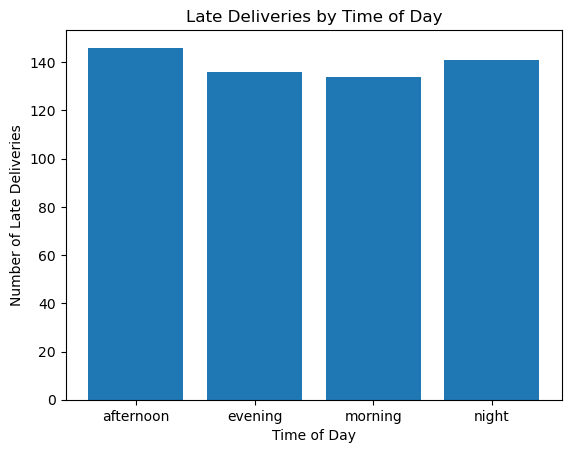

In [11]:
plt.bar(late_deliveries.index, late_deliveries.values)
plt.title('Late Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Late Deliveries')
plt.show()

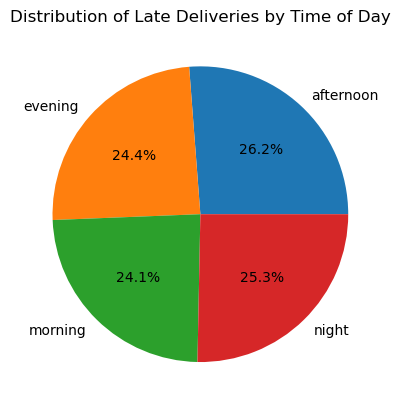

In [32]:
plt.pie(late_deliveries.values, labels=late_deliveries.index, autopct='%1.1f%%')
plt.title('Distribution of Late Deliveries by Time of Day')
plt.show()

In [34]:
delivery_time_95th = data['delivery_time'].quantile(0.95)

if delivery_time_95th < 31:
    print('95th percentile of delivery time is less than 31 minutes.')
else:
    print('95th percentile of delivery time is greater than or equal to 31 minutes.')

95th percentile of delivery time is less than 31 minutes.
